<a href="https://colab.research.google.com/github/naavsaa/Hactiv8-Python/blob/master/Pertemuan_6_Data_science_Data_cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

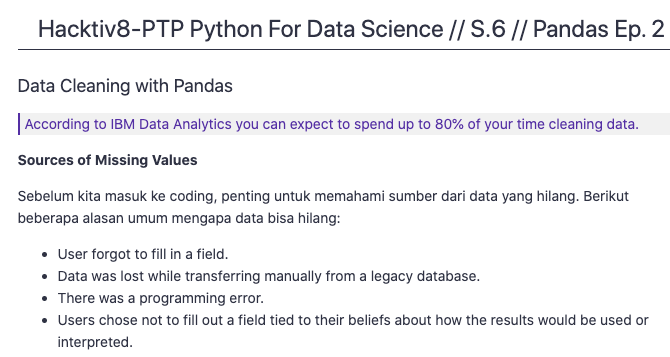

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [ ]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# PID : ada 1 data kosong / Nan
# ST_num : 2 Nan
# ST_name : full
# OWN_OCCUPIED : 1 kosong 1 salah format
# NUM_BEDROOMS : 4 kosong
# NUM_BATH : 1 kosong 1 salah format
# SQ_FT : 2 kosong

# Karena itu kita akan dilakukan data cleansing


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
missing_values = ["n/a","na","--"] # <- Non Standard Missing Values
df_new = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',na_values = missing_values)

# PID : ada 1 data kosong / Nan

print(f"""PID: 
{df['PID'].isnull()}
""") # <- Standard Missing values

# ST_num : 2 Nan
print("ST_NUM")
print(df['ST_NUM'].isnull()) # <- Standard Missing values

# ST_name : full
print("ST_NAME")
print(df['ST_NAME'].isnull()) # <- Standard Missing values

# OWN_OCCUPIED : 1 kosong 1 salah format
print("OWN OCCUPIED")
print(df['OWN_OCCUPIED'].isnull()) # <- Unexpected Missing values

#loop ini untuk menormalkan value

cnt=0
for row in df['OWN_OCCUPIED']:
  try:
    int(row)
    df.loc[cnt,'OWN_OCCUPIED']=np.nan
  except ValueError:
    pass
  cnt+=1

print(f"""Expected values {cnt}""")
print(df.head(9))

# NUM_BEDROOMS : 4 kosong
print("NUM_BEDROOMS")
print(df_new['NUM_BEDROOMS'].isnull())
print(df['NUM_BEDROOMS'].isnull())

# NUM_BATH : 1 kosong 1 salah format
print("NUM_BATH")
print(df['NUM_BATH'].isnull()) # <- Standard Missing values

nt=0
for row in df['NUM_BATH']:
  try:
    if(row) == 'HURLEY':
      df.loc[cnt,'NUM_BATH']=np.nan
  except ValueError:
    pass
  cnt+=1

print(f"""Expected values {cnt}""")
print(df.head(9))

# SQ_FT : 2 kosong
print("SQ_FT")
print(df['SQ_FT'].isnull()) # <- Standard Missing values



PID: 
0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: PID, dtype: bool

ST_NUM
0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool
ST_NAME
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: ST_NAME, dtype: bool
OWN OCCUPIED
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool
Expected values 9
           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY          NaN            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3   

In [ ]:
print("""
Before adding Non Standard Missing Values
""")
print(df.isnull().sum())
print("""
After adding Non Standard Missing Values
""")
print(df_new.isnull().sum())


Before adding Non Standard Missing Values

PID             2
ST_NUM          3
ST_NAME         1
OWN_OCCUPIED    3
NUM_BEDROOMS    3
NUM_BATH        2
SQ_FT           2
dtype: int64

After adding Non Standard Missing Values

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64


In [ ]:
df.isnull().values.any()

True

In [ ]:
#total error
df_new.isnull().sum().sum()

11

In [ ]:
## REPLACING ANY NULL VALUE

# fillna

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
missing_values = ["n/a","na","--"] # <- Non Standard Missing Values
df_new = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',na_values = missing_values)

# PID : ada 1 data kosong / Nan

print(f"""PID: 
{df['PID'].isnull()}
""") # <- Standard Missing values

df['PID'].fillna(0,inplace=True)


# ST_num : 2 Nan
print("ST_NUM")
print(df['ST_NUM'].isnull()) # <- Standard Missing values

median = df['ST_NUM'].median()
df['ST_NUM'].fillna(median,inplace=True)

print(df.head(9))


# ST_name : full
print("ST_NAME")
print(df['ST_NAME'].isnull()) # <- Standard Missing values

df['ST_NAME'].fillna("NORMAL",inplace=True)


# OWN_OCCUPIED : 1 kosong 1 salah format
print("OWN OCCUPIED")
print(df['OWN_OCCUPIED'].isnull()) # <- Unexpected Missing values

#loop ini untuk menormalkan value

cnt=0
for row in df['OWN_OCCUPIED']:
  try:
    int(row)
    df.loc[cnt,'OWN_OCCUPIED']=np.nan
  except ValueError:
    pass
  cnt+=1

print(f"""Expected values {cnt}""")
print(df.head(9))

df['OWN_OCCUPIED'].fillna("N",inplace=True)

# NUM_BEDROOMS : 4 kosong
print("NUM_BEDROOMS")
print(df_new['NUM_BEDROOMS'].isnull())
print(df['NUM_BEDROOMS'].isnull())

df['NUM_BEDROOMS'].fillna(0.0,inplace=True)


# NUM_BATH : 1 kosong 1 salah format
print("NUM_BATH")
print(df['NUM_BATH'].isnull()) # <- Standard Missing values

nt=0
for row in df['NUM_BATH']:
  try:
    if(row) == 'HURLEY':
      df.loc[cnt,'NUM_BATH']=np.nan
  except ValueError:
    pass
  cnt+=1

print(f"""Expected values {cnt}""")

df['NUM_BATH'].fillna(0.0,inplace=True)

print(df.head(9))

# SQ_FT : 2 kosong
print("SQ_FT")
print(df['SQ_FT'].isnull()) # <- Standard Missing values

df['SQ_FT'].fillna(0.0,inplace=True)

print(df.head(9))





PID: 
0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: PID, dtype: bool

ST_NUM
0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool
           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0   203.0   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          0.0   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0   203.0  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y        

In [ ]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [ ]:
data_age = data.parse(u'7.2',skiprows = 4,skipfooter = 14)
#before transaformation
print(data_age.head())
data_age.rename(columns = {u'Unnamed: 0': u'Year'},inplace=True)
data_age.dropna(inplace=True)

data_age.set_index('Year',inplace=True)
#after transformation
print(data_age.head())

  Unnamed: 0   Total  Under 16  16-24  ...  45-54  55-64  65-74  75 and over
0        NaN     NaN       NaN    NaN  ...    NaN    NaN    NaN          NaN
1    2002/03  1275.0     400.0   65.0  ...  216.0   94.0   52.0         23.0
2    2003/04  1711.0     579.0   67.0  ...  273.0  151.0   52.0         24.0
3    2004/05  2035.0     547.0  107.0  ...  364.0  174.0   36.0         32.0
4    2005/06  2564.0     583.0   96.0  ...  554.0  258.0   72.0         20.0

[5 rows x 10 columns]
          Total  Under 16  16-24  25-34  ...  45-54  55-64  65-74  75 and over
Year                                     ...                                  
2002/03  1275.0     400.0   65.0  136.0  ...  216.0   94.0   52.0         23.0
2003/04  1711.0     579.0   67.0  174.0  ...  273.0  151.0   52.0         24.0
2004/05  2035.0     547.0  107.0  287.0  ...  364.0  174.0   36.0         32.0
2005/06  2564.0     583.0   96.0  341.0  ...  554.0  258.0   72.0         20.0
2006/07  3862.0     656.0  184.0  461.0  

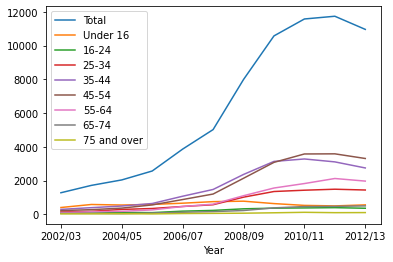

In [ ]:
data_age.plot()
#total data harus di drop alias di cleansing
data_age_minus_total = data_age.drop('Total',axis=1)

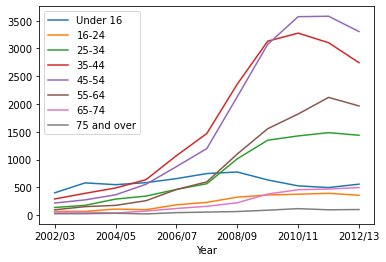

In [ ]:
#data final dan tervisualisasi
data_age_minus_total.plot()

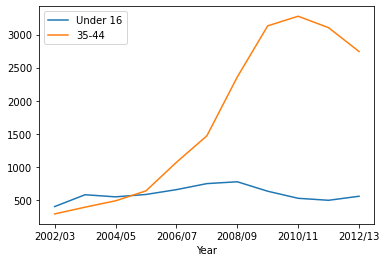

In [ ]:
#are children getting fatter ?

data_age['Under 16'].plot(label="Under 16",legend = True)
data_age['35-44'].plot(label="35-44",legend = True)

# the answer is no

In [ ]:
#Time Series

from datetime import datetime
date_rng = pd.date_range(start = '01/01/2020', end = '01/08/2020',freq='H') # H <- hour
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [ ]:
df = pd.DataFrame(date_rng,columns=['date'])
df['data'] = np.random.randint(0,100,size = (len(date_rng)))
print(df.head())

                 date  data
0 2020-01-01 00:00:00    45
1 2020-01-01 01:00:00    80
2 2020-01-01 02:00:00    98
3 2020-01-01 03:00:00    29
4 2020-01-01 04:00:00    61


In [ ]:
df['datetime'] = pd.to_datetime(df['date'])
df['data']=df.set_index('datetime')
df.drop(['date'], axis=1,inplace=True)
print(df.head())

  data            datetime
0  NaT 2020-01-01 00:00:00
1  NaT 2020-01-01 01:00:00
2  NaT 2020-01-01 02:00:00
3  NaT 2020-01-01 03:00:00
4  NaT 2020-01-01 04:00:00


In [ ]:
string_date_rng = [str(x) for x in date_rng]
#konversi dari string -> timestamp
timestamp_date_rng = pd.to_datetime(string_date_rng,infer_datetime_format = True)

#untuk konversi lain bisa dicoba sendiri ya...

         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
            Date  Consumption     Wind   Solar  Wind+Solar
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156


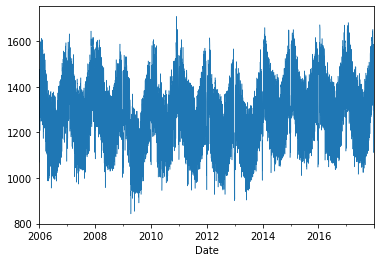

In [ ]:
#time series on dataset

opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

print(opsd_daily.head(3))

print(opsd_daily.tail(3))

#kita lakukan indexing

opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)
opsd_daily.index

#atau, ketika parsing kita bisa lakukan
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',index_col=0,parse_dates=True)
opsd_daily.head()

opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

opsd_daily.head()

#untuk filtering data bisa dicoba sendiri ya

#untuk visualisasi menggunakan matplotlib : 

opsd_daily['Consumption'].plot(linewidth=0.5)

#yang lain nya bisa dicoba sendiri ya : 
